# Credit Card Fraud Detection - Capstone Project

In this project you will predict fraudulent credit card transactions with the help of Machine learning models.

### Overview:::

Although digital transactions in India registered a 51% growth in 2018-19, their safety remains a concern. Fraudulent activities have increased severalfold, with around 52,304 cases of credit/debit card fraud reported in FY'19 alone. Due to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day. Machine learning can play a vital role in detecting fraudulent transactions.

### Objective:::

The objective for this project is to predict fraudulent credit card transactions with the help of machine learning models.

### Dataset overview:::

The dataset is taken from the Kaggle website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent. Since the dataset is highly imbalanced, so it needs to be handled before model building.

the data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for just 0.172% of the total transactions. The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others.



## Importing required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,accuracy_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#!pip install xgboost
from xgboost import XGBClassifier
from collections import Counter
from scipy import interp

import itertools
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#pip install xgboost

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
#observe the different feature type present in the data
print(df.dtypes)
print(df.columns)
print(df.describe())
print(df.info())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mea

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


##### by looking at the above percentage distribution, it is quite obvious that data is highly imbalanced.

Text(0.5, 0, 'Class (0-Non-Fraudulent, 1-Fraudulent)')

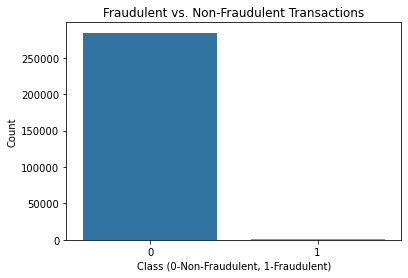

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure()
sns.barplot(x=classes.index, y=classes)
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0-Non-Fraudulent, 1-Fraudulent)')

Text(0, 0.5, 'Class')

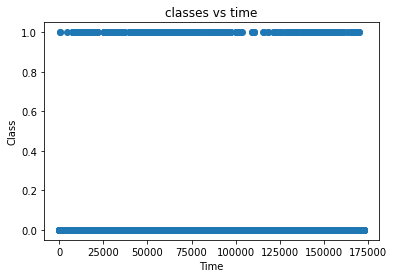

In [8]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure()
plt.scatter(df.Time, df.Class)
plt.title('classes vs time')
plt.xlabel('Time')
plt.ylabel('Class')

Text(0, 0.5, 'Class (0-Non-Fraudulent, 1-Fraudulent)')

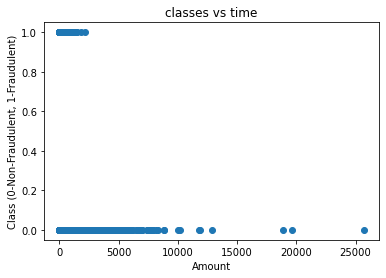

In [9]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df.Amount,df.Class)
plt.title('classes vs time')
plt.xlabel('Amount')
plt.ylabel('Class (0-Non-Fraudulent, 1-Fraudulent)')

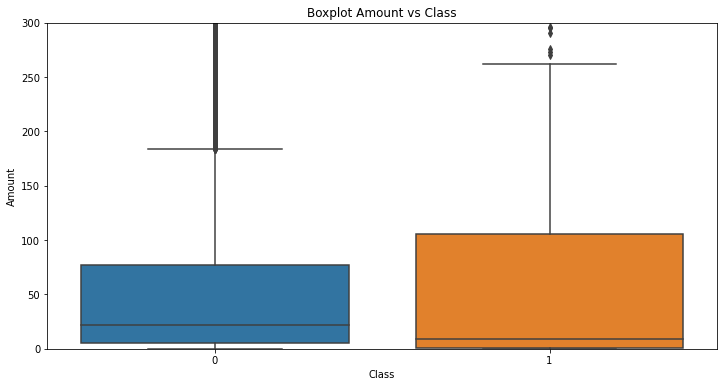

In [10]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x = df.Class, y = df.Amount, data = df)
ax.set_ylim([0, 300])
plt.title('Boxplot Amount vs Class')
plt.show()

### Plotting the distribution of a variable

<Figure size 1800x3600 with 0 Axes>

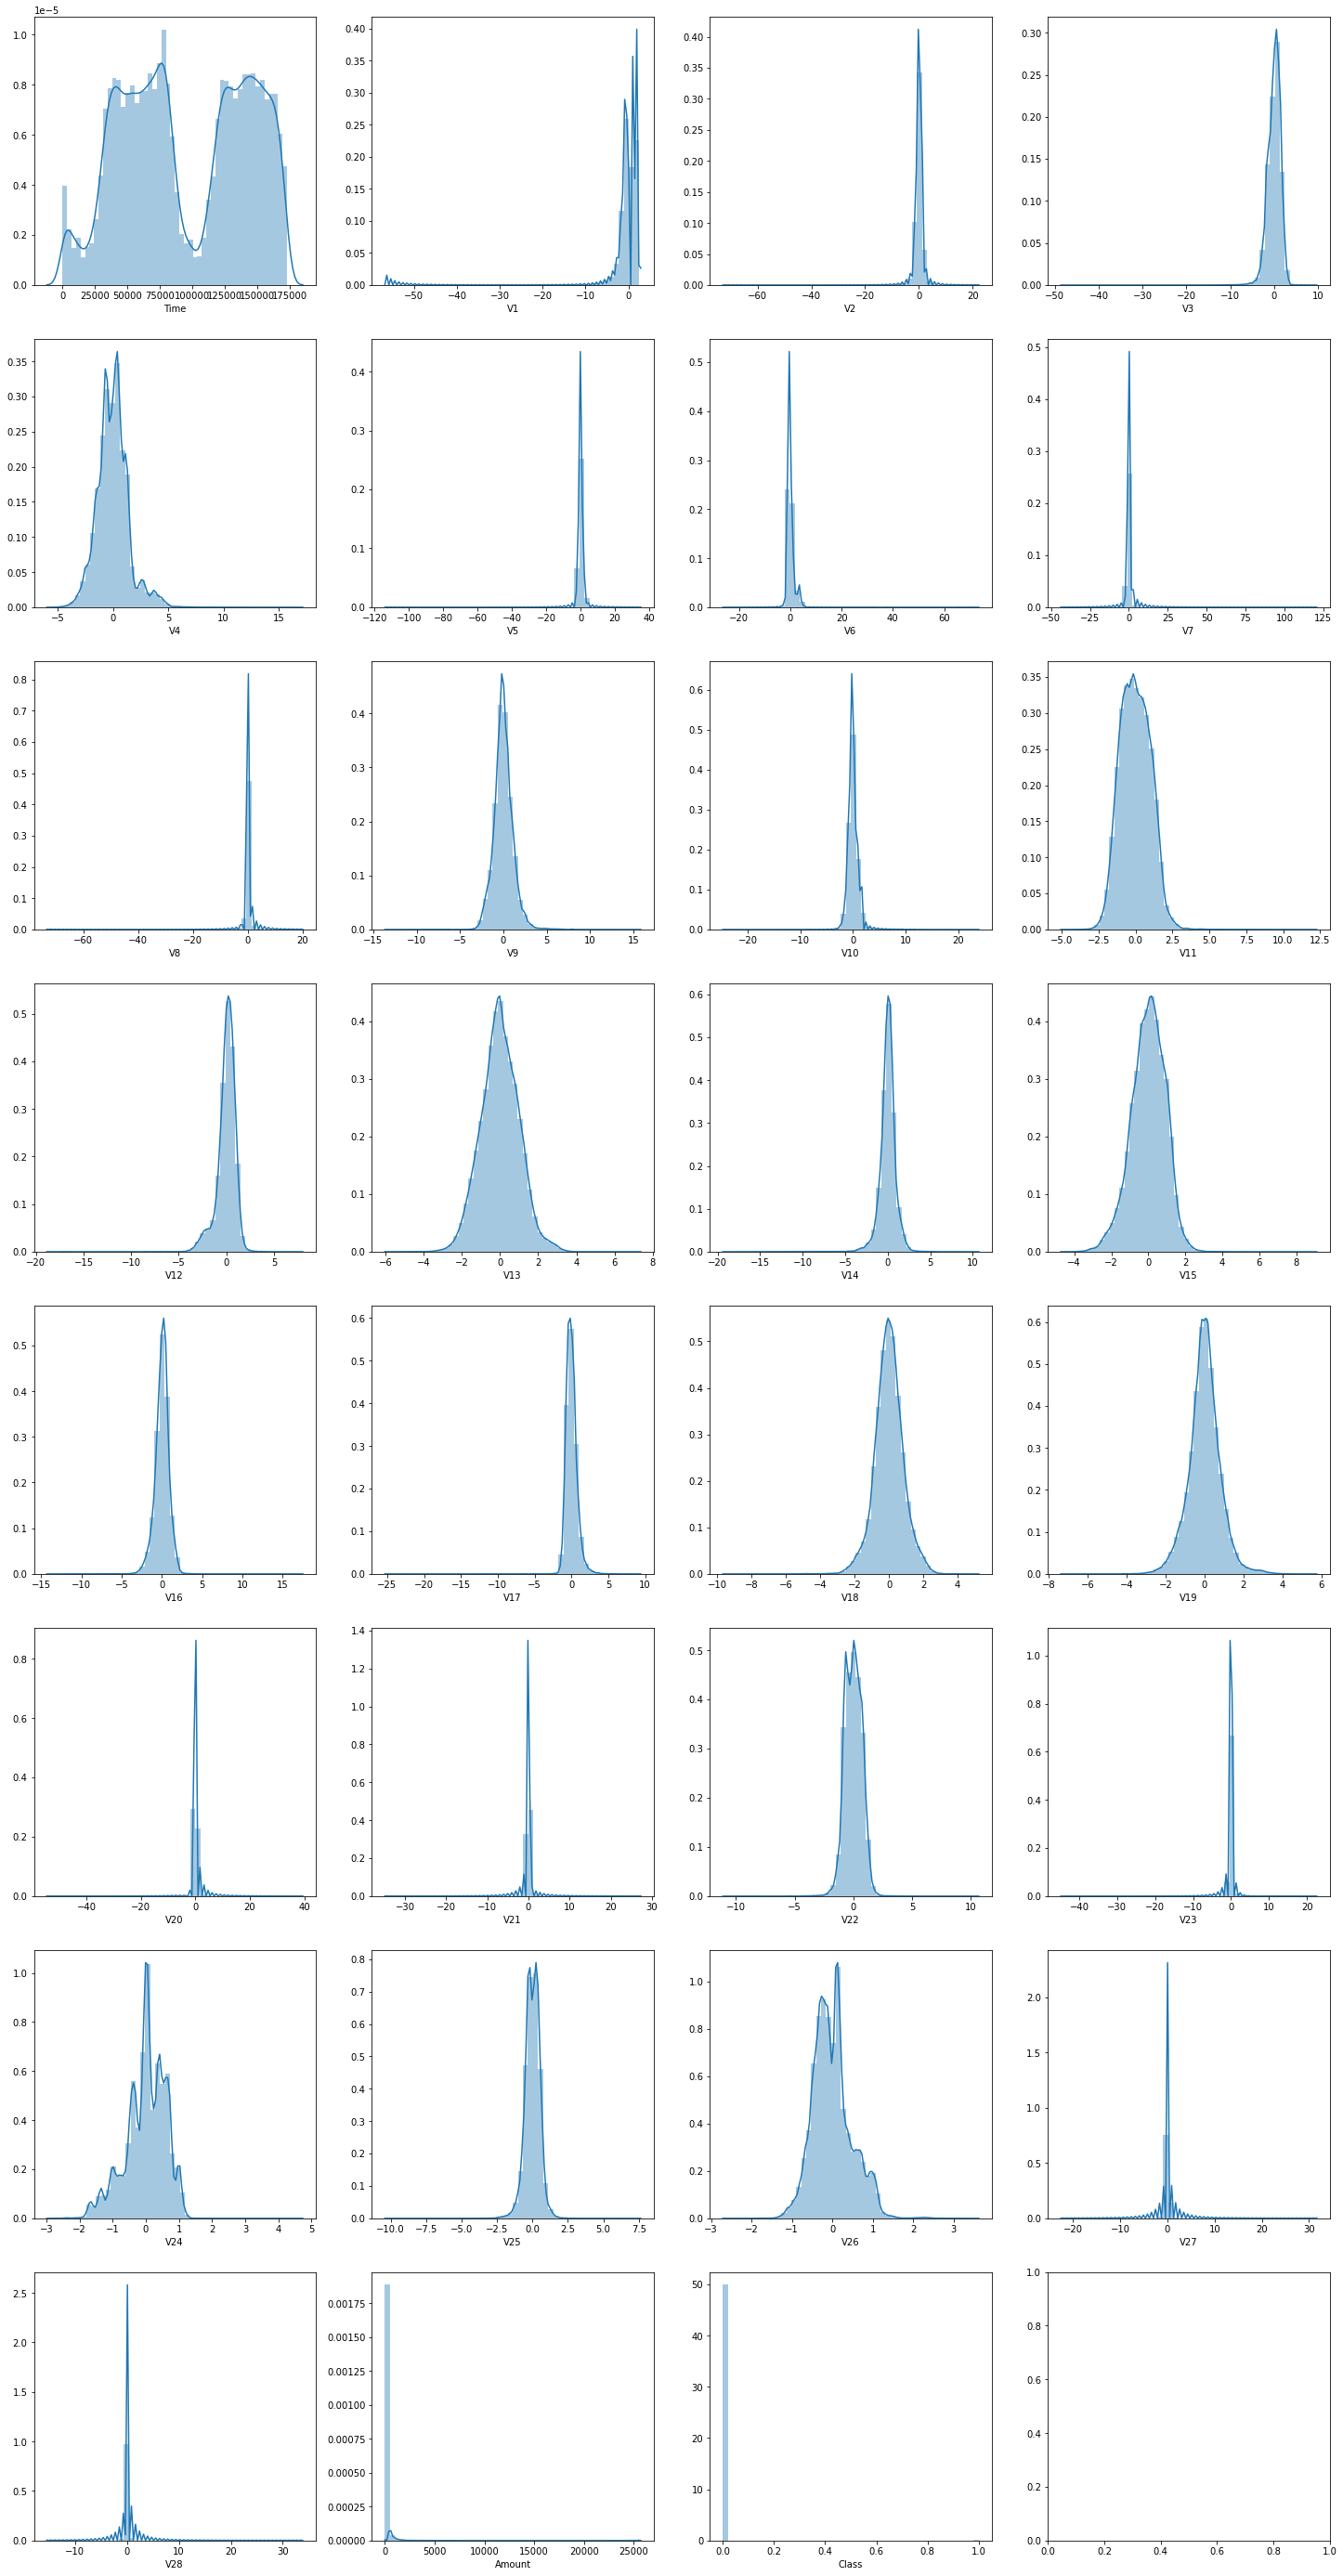

In [11]:
#Check the gaussian distribution of all the independent variables

plt.figure(figsize=(25, 50))
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(25,50))
for i, column in enumerate(df.columns):
    sns.distplot(df[column],ax=axes[i//4,i%4])

In [12]:
# Drop unnecessary columns
#df.drop(['Amount', 'Time'], axis=1, inplace=True)

## Splitting the data into train & test data

In [13]:
y= df['Class']#class variable
X = df.drop(['Class'],axis=1)
X.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  
0  0.128539 -0.189115  0.133558 -0.021053  149.62  
1  0.167170  0.125895 -0.008983  0.014724    2.69  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66  
3  0.647376 -0.221929  0.062723  0.061458  123.50  
4 -0.206010  0.502292  0.219422  0.215153   69.99  

[5 rows x 30 columns]

#### Train Test Split data using stratified fold

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [15]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [17]:
#Apply standard scalling to 'Amount' & 'Time'
StdScaler = StandardScaler()
X_train[['Amount','Time']]=StdScaler.fit_transform(X_train[['Amount','Time']])
X_test[['Amount','Time']]=StdScaler.transform(X_test[['Amount','Time']])

In [18]:
X_train

Time        V1        V2        V3        V4        V5        V6  \
249927  1.257992 -0.012102  0.707332  0.163334 -0.756498  0.590999 -0.653429   
214082  0.939713  1.776151 -0.184642 -2.204096  1.191668  0.614461 -1.016525   
106005 -0.528960 -1.083391 -4.440527 -1.399530  0.469764 -2.076458 -0.766137   
58619  -0.977583 -0.518847  1.025087 -0.614624 -0.780959  2.474666  3.335055   
191638  0.725456 -0.640421  0.212171  0.283341 -1.786916  2.616127  4.024863   
...          ...       ...       ...       ...       ...       ...       ...   
3441   -1.936441 -0.415022  0.713439  1.221551 -2.108216  0.187067 -1.281616   
233802  1.112066  1.993864 -0.516866 -0.620118  0.129845 -0.285128  0.395044   
85418  -0.718769 -1.497933  0.657921  1.581568 -0.024286  0.584698  1.303031   
29062  -1.254947  1.069777  0.072105  0.496540  1.505318 -0.380277 -0.370243   
17677  -1.390850 -0.598120  0.775041  1.823394  0.312991 -0.096171 -0.391452   

              V7        V8        V9  ...       V20       V21       V22  \
249927  0.844608 -0.001672 -0.184399  ... -0.038329 -0.231385 -0.572415   
214082  0.919254 -0.387465 -0.318277  ... -0.030437  0.281190  0.530070   
106005  1.601441 -0.709176 -1.288745  ...  2.189260  0.346463 -1.432833   
58619   0.046111  0.794249 -0.322448  ...  0.225957 -0.193099 -0.708348   
191638 -0.198897  0.937087  0.474428  ...  0.154309  0.167939  0.759218   
...          ...       ...       ...  ...       ...       ...       ...   
3441    1.118548 -0.345326  0.463473  ...  0.075377  0.132886  0.756938   
233802 -0.822358  0.231591  0.995898  ... -0.174051  0.262526  0.884510   
85418   0.609212  0.135561  0.452745  ... -0.225079 -0.072452  0.299172   
29062   0.100551 -0.026687  0.319684  ... -0.149402 -0.061991 -0.044629   
17677   0.499351  0.071224 -0.017496  ...  0.102259  0.060615  0.568083   

             V23       V24       V25       V26       V27       V28    Amount  
249927  0.042660 -0.360882 -0.494703  0.142657  0.235922  0.083758 -0.321082  
214082 -0.232262 -0.342096  0.492355 -0.427682 -0.075228 -0.056755  0.243475  
106005 -1.097063  0.505926 -0.140185  0.870190 -0.316982  0.227833  4.797594  
58619   0.145672  0.944217 -0.788017  0.039995  0.010804  0.254309 -0.331514  
191638 -0.321412  0.767971 -0.084221  0.612936  0.074029 -0.033344 -0.331514  
...          ...       ...       ...       ...       ...       ...       ...  
3441   -0.290888  0.558730  0.037363 -0.871689  0.239482 -0.020422 -0.345305  
233802  0.099141  0.275689 -0.195404  0.623598 -0.032455 -0.058552 -0.325587  
85418   0.110048 -0.615980 -0.425883  0.263968 -0.448445  0.045178 -0.203089  
29062  -0.050485  0.400171  0.593314 -0.335160  0.031014  0.024886 -0.169777  
17677  -0.084001  0.685003 -0.245859  0.356638  0.378580  0.206366 -0.321635  

[199364 rows x 30 columns]

In [19]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=False)
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

In [20]:
X_train_pt

array([[ 1.26128907, -0.2676968 ,  0.40478241, ...,  0.57846416,
         0.26703825, -0.827435  ],
       [ 0.93944136,  1.16716777, -0.20178163, ..., -0.19553705,
        -0.16652054,  1.43942257],
       [-0.53274428, -0.79237276, -2.38547895, ..., -0.78377484,
         0.70492067,  2.08652541],
       ...,
       [-0.7212008 , -0.95789142,  0.36893244, ..., -1.09956993,
         0.14867526,  0.02476247],
       [-1.25197538,  0.52069681, -0.03697308, ...,  0.06652736,
         0.08621695,  0.21629332],
       [-1.38618887, -0.57669208,  0.45426788, ...,  0.93938912,
         0.6400706 , -0.83214014]])

<Figure size 1800x3600 with 0 Axes>

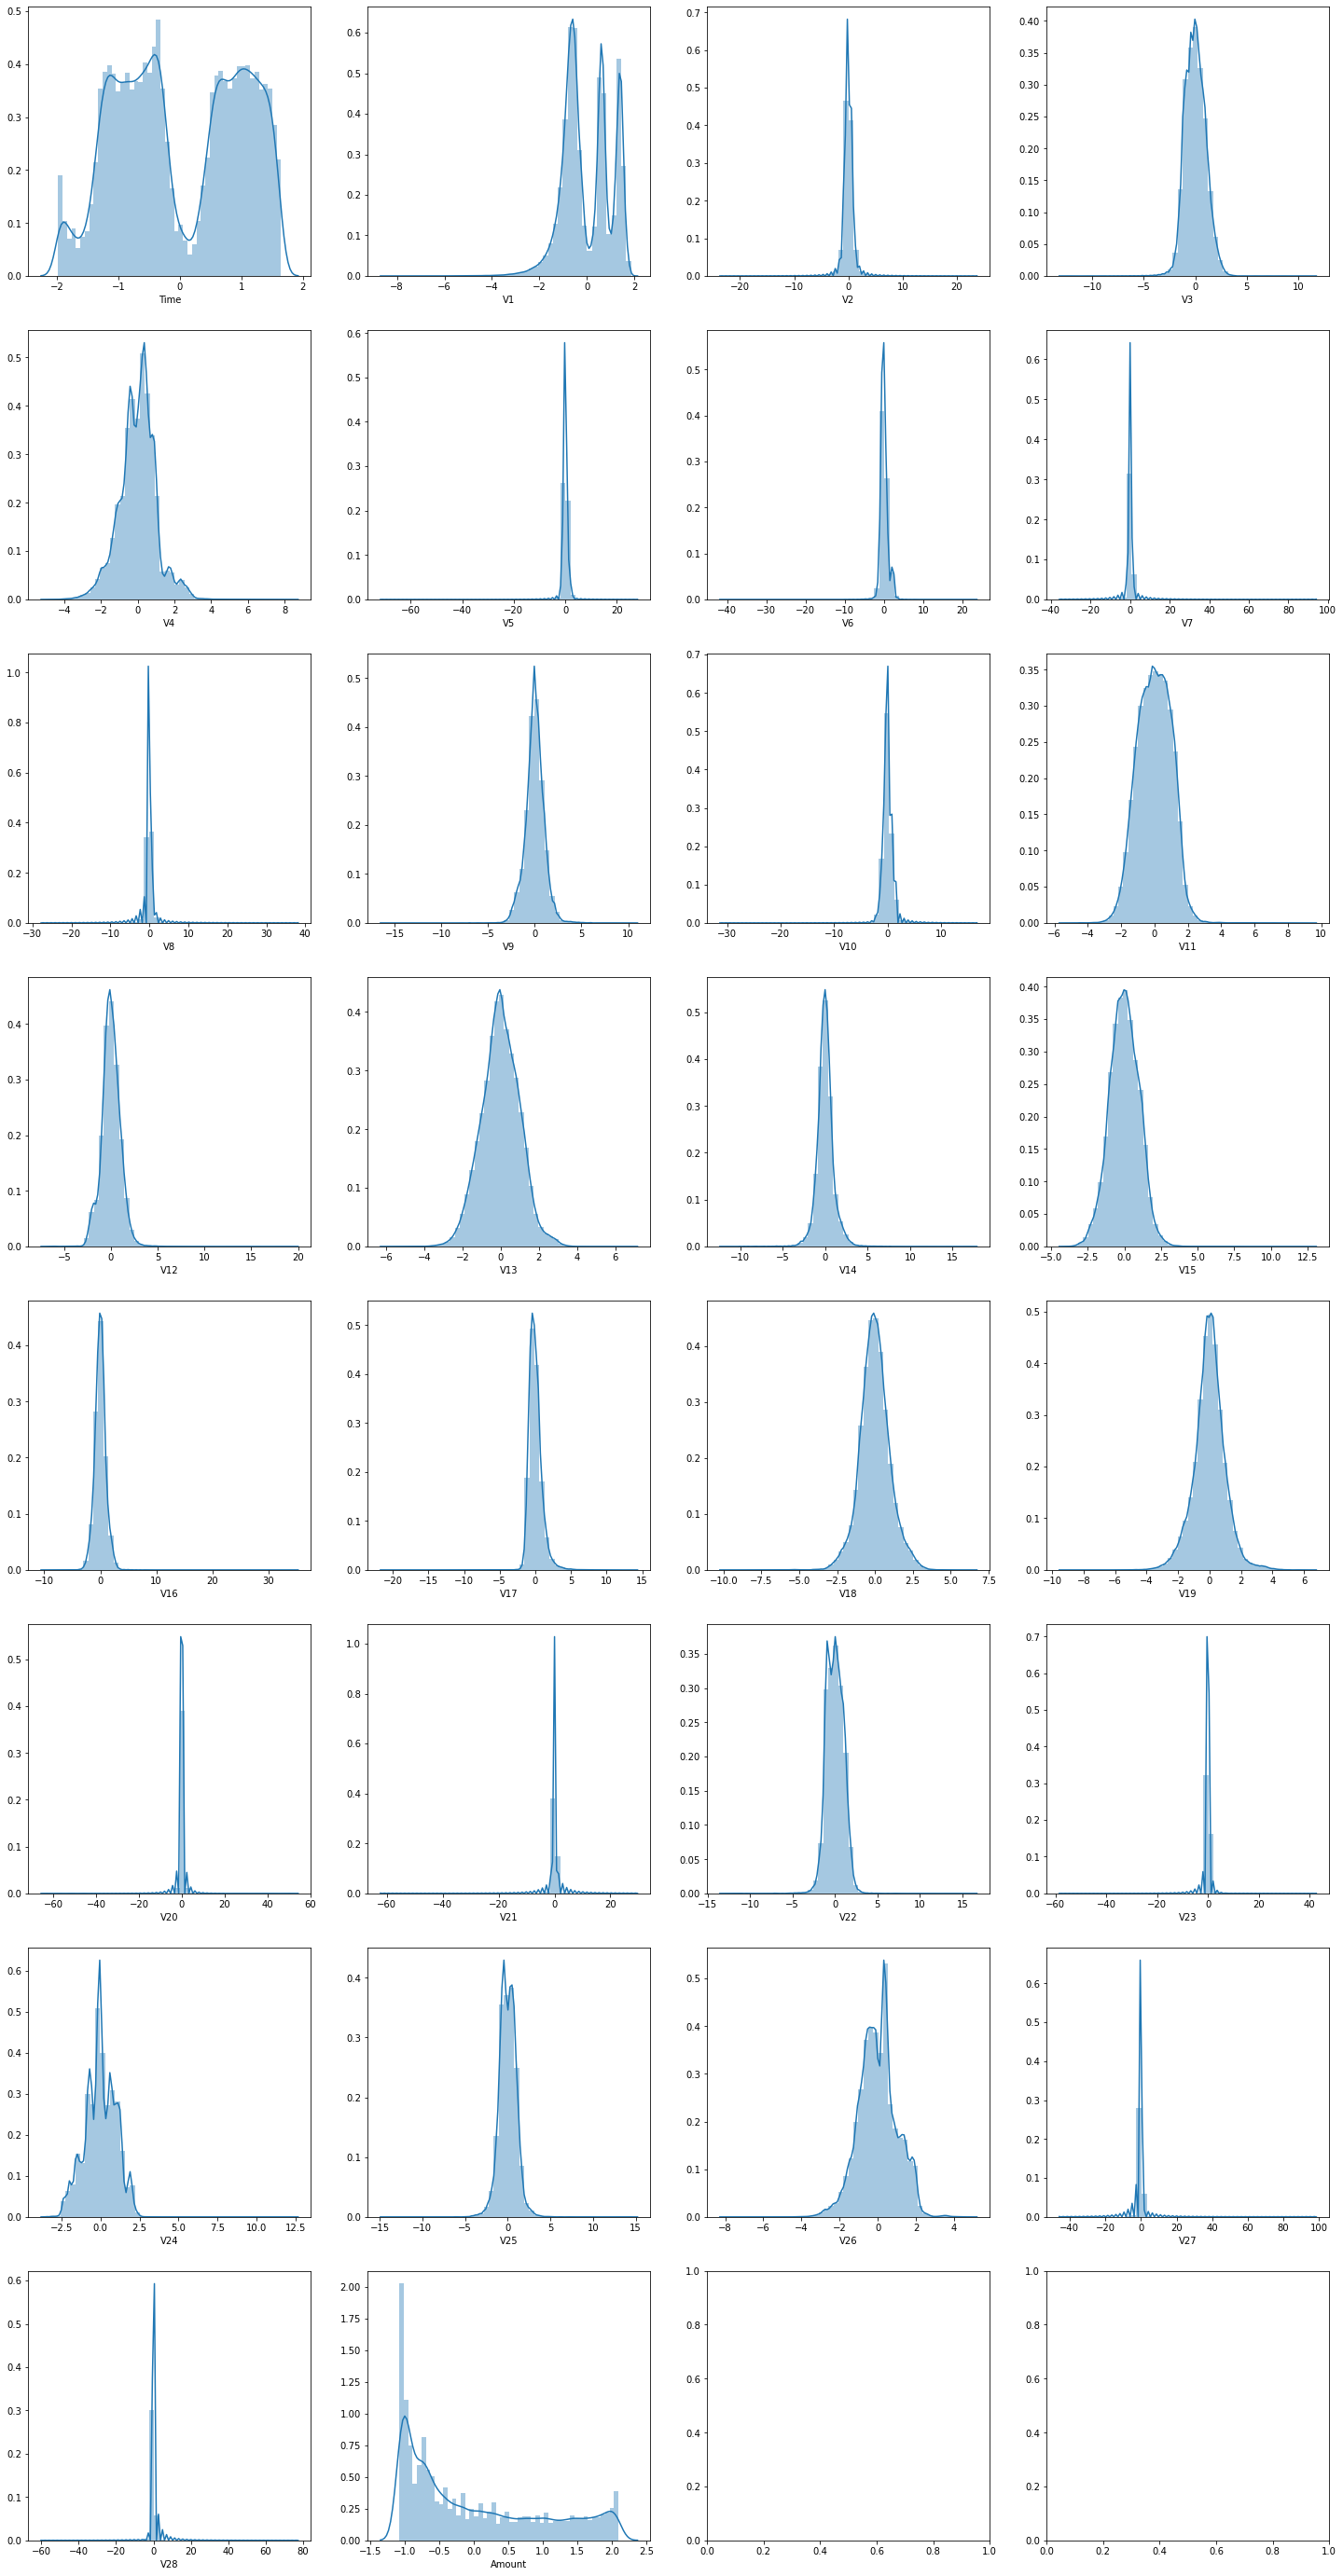

In [22]:
#Check the distribution of all the independent variables again

plt.figure(figsize=(25, 50))
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(25,50))
for i, column in enumerate(X_train.columns):
    sns.distplot(X_train[column],ax=axes[i//4,i%4])

## Model Building on the imbalanced dataset

- Build different models on the imbalanced dataset and see the result

###  1. Logistic Regression on imbalanced data

In [146]:
# Logistic Regression

log_params = {'C':np.arange(0.0001, 1, 0.02),'max_iter':range(50,300,50)}

kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
logreg = LogisticRegression(random_state=42, n_jobs=-1)

#perform cross validation 

logreg_model_cv = GridSearchCV(estimator=logreg, param_grid=log_params, scoring='roc_auc', n_jobs=-1, 
                           cv=kfolds.split(X_train_pt,y_train),verbose=1, return_train_score=True)
logreg_model_cv.fit(X_train_pt,y_train)

lg_cv_results = pd.DataFrame(logreg_model_cv.cv_results_)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 17.4min finished


In [147]:
lg_cv_results = pd.DataFrame(logreg_model_cv.cv_results_)
lg_cv_results.head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       2.246717      0.514109         0.064223        0.026713  0.0001   
1       2.323327      0.484634         0.046866        0.009818  0.0001   
2       2.797340      0.165355         0.064209        0.019167  0.0001   
3       3.405189      0.128010         0.070170        0.009680  0.0001   
4       3.062898      0.465343         0.083972        0.016904  0.0001   

  param_max_iter                          params  split0_test_score  \
0             50   {'C': 0.0001, 'max_iter': 50}           0.945901   
1            100  {'C': 0.0001, 'max_iter': 100}           0.945901   
2            150  {'C': 0.0001, 'max_iter': 150}           0.945901   
3            200  {'C': 0.0001, 'max_iter': 200}           0.945901   
4            250  {'C': 0.0001, 'max_iter': 250}           0.945901   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.953546           0.958566  ...         0.957659        0.008085   
1           0.953546           0.958566  ...         0.957659        0.008085   
2           0.953546           0.958566  ...         0.957659        0.008085   
3           0.953546           0.958566  ...         0.957659        0.008085   
4           0.953546           0.958566  ...         0.957659        0.008085   

   rank_test_score  split0_train_score  split1_train_score  \
0              246            0.962965            0.955865   
1              246            0.962965            0.955865   
2              246            0.962965            0.955865   
3              246            0.962965            0.955865   
4              246            0.962965            0.955865   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.959568            0.961415             0.95726   
1            0.959568            0.961415             0.95726   
2            0.959568            0.961415             0.95726   
3            0.959568            0.961415             0.95726   
4            0.959568            0.961415             0.95726   

   mean_train_score  std_train_score  
0          0.959415         0.002603  
1          0.959415         0.002603  
2          0.959415         0.002603  
3          0.959415         0.002603  
4          0.959415         0.002603  

[5 rows x 22 columns]

In [101]:
# check for the best estimator
logreg_model_cv.best_estimator_.get_params()

{'C': 0.0201,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 50,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [102]:
# fit the model on train set using best estimator
logreg.set_params(**logreg_model_cv.best_estimator_.get_params())

LogisticRegression(C=0.0201, max_iter=50, n_jobs=-1, random_state=42)

In [103]:
# predict train data set
logreg_train_pred_prob = logreg.fit(X_train_pt, y_train).predict_proba(X_train_pt)[:,1]
logreg_train_pred_prob

array([8.94210653e-05, 3.18953447e-04, 4.80467840e-04, ...,
       4.27478376e-04, 4.35594881e-04, 2.20806987e-04])

In [104]:
# predict test dataset
logreg_test_pred_prob = logreg.predict_proba(X_test_pt)[:,1]
logreg_test_pred_prob

array([2.50918184e-04, 2.94694031e-04, 4.04332859e-04, ...,
       7.65868818e-05, 2.47635872e-04, 7.17983375e-05])

#### The below function is defined for plotting auc-roc curve, precision-recall and confusion matrix 

In [162]:
def roc_precision_recall_curve_confus_matrix(y_true,y_pred_prob,
                                             EnTrain=True,Atv_F1_Max_Thres=False,opt_thres=0.5,TakeOverMan_Thres=False):
    # plot ROC curve
    plt.figure(figsize=(15, 5))

    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_prob,drop_intermediate = False )
    auc_score = metrics.roc_auc_score(y_true, y_pred_prob)

    plt.subplot(1,3,1)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    
    if(EnTrain and (not(Atv_F1_Max_Thres))):
        # plot precision and recall tradeoff 
        pr,re, thresholds = metrics.precision_recall_curve(y_true, y_pred_prob)
        p_r_h_df = pd.DataFrame(data = [pr[:-1],re[:-1], thresholds]).T
        p_r_h_df.columns = ['precision','recall','threshold']
        p_r_h_df['abs_diff_pr_re'] =abs(p_r_h_df['precision']-p_r_h_df['recall'])
        
        if(not(TakeOverMan_Thres)):
            opt_thres = p_r_h_df.loc[p_r_h_df['abs_diff_pr_re'] == p_r_h_df['abs_diff_pr_re'].min()]['threshold'].tolist()[0]

        plt.subplot(1,3,2)
        plt.plot(thresholds, pr[:-1], 'g-', label= 'precision')
        plt.plot(thresholds, re[:-1], 'r-', label= 'recall')
        plt.axvline(x=opt_thres, color='b',linestyle='--')
        plt.xlabel('Threshold_Value')
        plt.ylabel('Rate')
        plt.title('Precision_Recall tradeoff plot')
        plt.legend(loc="lower right")
    
    elif(EnTrain and (Atv_F1_Max_Thres)): #
        precision, recall, thresholds = metrics.precision_recall_curve(y_true, y_pred_prob)
        f1 = 0.0
        opt_thres
        for i in range(0, len(thresholds)):
            if not (precision[i] == 0 and recall[i] == 0):
                f = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
                if f > f1:
                    f1 = f
                    opt_thres = thresholds[i] 
        print('Maximum_F1_Score:',round(f1,3))


    # Confusion matrix
    y_train_pred = (y_pred_prob>opt_thres).astype('int16')
    confusion = metrics.confusion_matrix(y_true, y_train_pred)

    #print the evaluation result by choosing a evaluation metric
    print(metrics.classification_report(y_true, y_train_pred)) # check the classification report
    print('Best optimum threshold value is: ',round(opt_thres,3))
    return(opt_thres)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.80      0.80      0.80       344

    accuracy                           1.00    199364
   macro avg       0.90      0.90      0.90    199364
weighted avg       1.00      1.00      1.00    199364

Best optimum threshold value is:  0.119


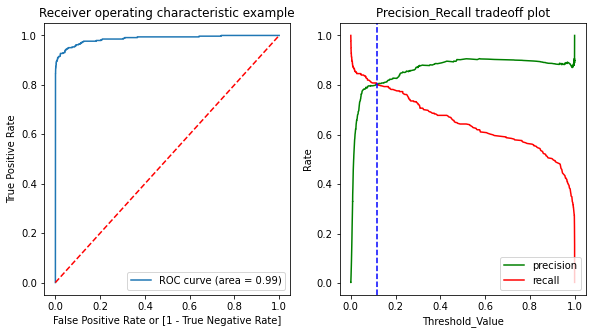

In [129]:
logreg_threshold=roc_precision_recall_curve_confus_matrix(y_train, logreg_train_pred_prob,EnTrain=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.76      0.76       148

    accuracy                           1.00     85443
   macro avg       0.88      0.88      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.119


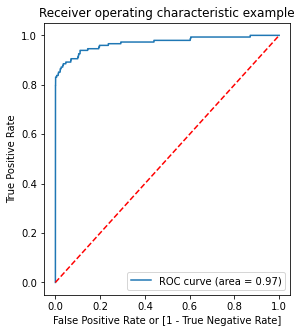

In [131]:
logreg_threshold_test = roc_precision_recall_curve_confus_matrix(y_test,logreg_test_pred_prob,
                                                        EnTrain=False,opt_thres=logreg_threshold)

In [57]:
del final_df

In [58]:
dict1 = {'ML_Model':['Logistic Regression'],'ROC_AUC_Score':[0.97],'Threshold':[0.119],'Precision':[0.76],'Recall':[0.76],'F1-Score':[0.76]}
final_df = pd.DataFrame(dict1)
final_df

ML_Model  ROC_AUC_Score  Threshold  Precision  Recall  F1-Score
0  Logistic Regression           0.97      0.119       0.76    0.76      0.76

### 2. Decision Tree on imbalanced dataset 

In [164]:
dtc = DecisionTreeClassifier(random_state=42)
path = dtc.cost_complexity_pruning_path(X_train_pt,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [25]:
# DecisionTree 
DT = DecisionTreeClassifier(random_state=42,criterion='entropy')
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

#perform cross validation 
dt_params = {'max_depth':range(2,5),'ccp_alpha':list(np.arange(2e-5,5.5e-5,0.65e-5))}

dt_model_cv = GridSearchCV(estimator=DT, param_grid=dt_params, scoring='roc_auc', n_jobs=-1, 
                            cv=kfolds.split(X_train_pt,y_train),verbose=1, return_train_score=True)
dt_model_cv.fit(X_train_pt,y_train)

dt_cv_results = pd.DataFrame(dt_model_cv.cv_results_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  3.3min finished


In [27]:
dt_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.126097      0.047803         0.032315        0.003062   
1       8.062687      0.421214         0.029721        0.001466   
2      11.206882      0.502628         0.029921        0.001411   
3       5.516855      0.302818         0.035907        0.010608   
4       8.234989      0.240457         0.038498        0.018157   

  param_ccp_alpha param_max_depth                                   params  \
0           2e-05               2     {'ccp_alpha': 2e-05, 'max_depth': 2}   
1           2e-05               3     {'ccp_alpha': 2e-05, 'max_depth': 3}   
2           2e-05               4     {'ccp_alpha': 2e-05, 'max_depth': 4}   
3        2.65e-05               2  {'ccp_alpha': 2.65e-05, 'max_depth': 2}   
4        2.65e-05               3  {'ccp_alpha': 2.65e-05, 'max_depth': 3}   

   split0_test_score  split1_test_score  split2_test_score  ...  \
0           0.927294           0.919959           0.934446  ...   
1           0.932189           0.932463           0.960303  ...   
2           0.965663           0.944564           0.953696  ...   
3           0.927294           0.919959           0.934446  ...   
4           0.932189           0.932463           0.960303  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.921162        0.013004               13            0.926974   
1         0.936927        0.012851               10            0.953571   
2         0.939610        0.028956                7            0.977263   
3         0.921162        0.013004               13            0.926974   
4         0.936927        0.012851               10            0.953571   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.928790            0.923394            0.921575   
1            0.970476            0.954020            0.955821   
2            0.985155            0.975387            0.976053   
3            0.928790            0.923394            0.921575   
4            0.970476            0.954020            0.955821   

   split4_train_score  mean_train_score  std_train_score  
0            0.927316          0.925610         0.002686  
1            0.975450          0.961867         0.009225  
2            0.986314          0.980034         0.004707  
3            0.927316          0.925610         0.002686  
4            0.975450          0.961867         0.009225  

[5 rows x 22 columns]

In [29]:
DT.set_params(**dt_model_cv.best_estimator_.get_params())

DecisionTreeClassifier(ccp_alpha=4.599999999999999e-05, criterion='entropy',
                       max_depth=4, random_state=42)

In [30]:
dt_train_pred_prob = DT.fit(X_train_pt, y_train).predict_proba(X_train_pt)[:,1]
dt_train_pred_prob

array([2.85357589e-05, 3.77065543e-04, 2.85357589e-05, ...,
       2.85357589e-05, 3.77065543e-04, 2.85357589e-05])

In [31]:
dt_test_pred_prob = DT.predict_proba(X_test_pt)[:,1]
dt_test_pred_prob

array([2.85357589e-05, 2.85357589e-05, 3.77065543e-04, ...,
       2.85357589e-05, 2.85357589e-05, 2.85357589e-05])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.88      0.83      0.86       344

    accuracy                           1.00    199364
   macro avg       0.94      0.92      0.93    199364
weighted avg       1.00      1.00      1.00    199364

Best optimum threshold value is:  0.143


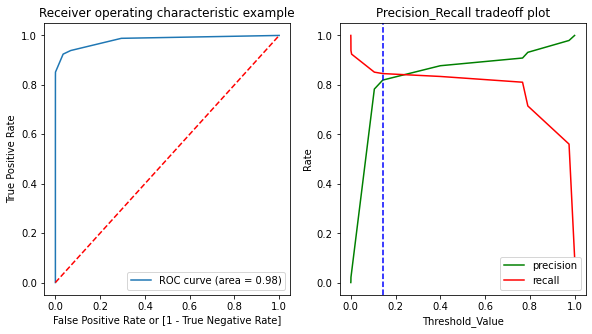

In [34]:
dt_threshold=roc_precision_recall_curve_confus_matrix(y_train, dt_train_pred_prob,EnTrain=True, opt_thres=0.5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.76      0.79       148

    accuracy                           1.00     85443
   macro avg       0.91      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.143


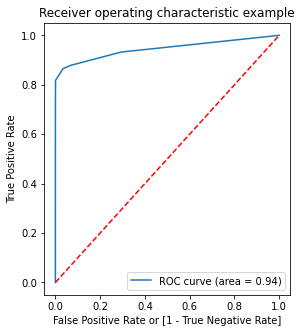

In [35]:
dt_threshold_test = roc_precision_recall_curve_confus_matrix(y_test,dt_test_pred_prob,
                                                        EnTrain=False,opt_thres=dt_threshold)

In [59]:
dict2 = {'ML_Model':'Decision Tree','ROC_AUC_Score':0.94,'Threshold':0.143,'Precision':0.82,'Recall':0.76,'F1-Score':0.79}
final_df = final_df.append(dict2, ignore_index= True)
final_df

ML_Model  ROC_AUC_Score  Threshold  Precision  Recall  F1-Score
0  Logistic Regression           0.97      0.119       0.76    0.76      0.76
1        Decision Tree           0.94      0.143       0.82    0.76      0.79

### 3. Random Forest Classifier on imbalanced dataset

In [60]:
# RandomForestClassifier 
rfc = RandomForestClassifier(random_state=42, n_jobs=-1,bootstrap=False,criterion='entropy')
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

#perform cross validation 
rfc_params = {'n_estimators':range(10,200,5),'max_depth':range(2,15,2),
              'ccp_alpha':list(np.arange(2e-5,5.5e-5,0.65e-5))}

rfc_model_cv = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_params,n_iter=25, scoring='roc_auc', n_jobs=-1, 
                            cv=kfolds.split(X_train_pt,y_train),verbose=1, return_train_score=True)
rfc_model_cv.fit(X_train_pt,y_train)

rfc_cv_results = pd.DataFrame(rfc_model_cv.cv_results_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 119.4min finished


In [61]:
rfc_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      69.585419      3.445309         0.669412        0.553931   
1     176.981983      1.615914         1.684499        0.374028   
2     165.889430      3.027542         1.596534        0.239676   
3     134.460430      2.416679         1.755110        0.375739   
4     153.382657      1.343114         2.007834        0.372185   

  param_n_estimators param_max_depth param_ccp_alpha  \
0                 20              12         4.6e-05   
1                115               4        3.95e-05   
2                 60               8           2e-05   
3                 60               6        2.65e-05   
4                100               4        5.25e-05   

                                              params  split0_test_score  \
0  {'n_estimators': 20, 'max_depth': 12, 'ccp_alp...           0.990024   
1  {'n_estimators': 115, 'max_depth': 4, 'ccp_alp...           0.987247   
2  {'n_estimators': 60, 'max_depth': 8, 'ccp_alph...           0.989874   
3  {'n_estimators': 60, 'max_depth': 6, 'ccp_alph...           0.989682   
4  {'n_estimators': 100, 'max_depth': 4, 'ccp_alp...           0.987010   

   split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.963509  ...         0.975422        0.015463               14   
1           0.968396  ...         0.975093        0.009640               15   
2           0.969422  ...         0.977661        0.012045                4   
3           0.963371  ...         0.976960        0.011379                9   
4           0.968588  ...         0.975076        0.009275               16   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.999547            0.999943            0.999119   
1            0.986780            0.990376            0.987858   
2            0.999531            0.999972            0.999866   
3            0.996652            0.998805            0.997935   
4            0.986292            0.990597            0.987906   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.999819            0.999908          0.999667         0.000307  
1            0.987216            0.990904          0.988627         0.001688  
2            0.999937            0.999952          0.999852         0.000164  
3            0.996859            0.997892          0.997629         0.000786  
4            0.986125            0.990364          0.988257         0.001921  

[5 rows x 23 columns]

In [62]:
rfc.set_params(**rfc_model_cv.best_estimator_.get_params())

RandomForestClassifier(bootstrap=False, ccp_alpha=4.599999999999999e-05,
                       criterion='entropy', max_depth=12, n_estimators=125,
                       n_jobs=-1, random_state=42)

In [63]:
rfc_train_pred_prob = rfc.fit(X_train_pt, y_train).predict_proba(X_train_pt)[:,1]
rfc_train_pred_prob

array([4.49402618e-05, 1.83078325e-04, 1.75601849e-04, ...,
       1.58696177e-04, 1.51757417e-04, 5.28244976e-05])

In [64]:
rfc_test_pred_prob = rfc.predict_proba(X_test_pt)[:,1]
rfc_test_pred_prob

array([4.16904080e-04, 9.08225441e-05, 3.15742569e-04, ...,
       5.07315953e-05, 1.08472171e-04, 1.38631109e-04])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.86      0.86      0.86       344

    accuracy                           1.00    199364
   macro avg       0.93      0.93      0.93    199364
weighted avg       1.00      1.00      1.00    199364

Best optimum threshold value is:  0.141


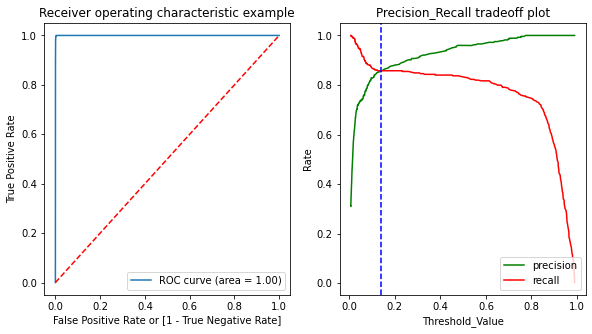

In [65]:
rfc_threshold = roc_precision_recall_curve_confus_matrix(y_train,rfc_train_pred_prob,
                                                        EnTrain=True,opt_thres=0.5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.82      0.80       148

    accuracy                           1.00     85443
   macro avg       0.89      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.141


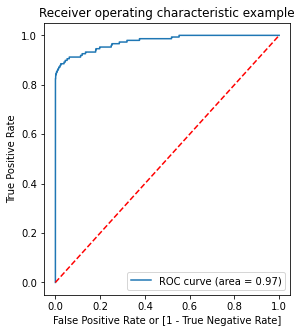

In [66]:
rfc_threshold_test = roc_precision_recall_curve_confus_matrix(y_test,rfc_test_pred_prob,
                                                        EnTrain=False,opt_thres=rfc_threshold)

In [67]:
dict3 = {'ML_Model':'Random Forest','ROC_AUC_Score':0.97,'Threshold':0.141,'Precision':0.78,'Recall':0.82,'F1-Score':0.80}
final_df = final_df.append(dict3, ignore_index= True)
final_df

ML_Model  ROC_AUC_Score  Threshold  Precision  Recall  F1-Score
0  Logistic Regression           0.97      0.119       0.76    0.76      0.76
1        Decision Tree           0.94      0.143       0.82    0.76      0.79
2        Random Forest           0.97      0.141       0.78    0.82      0.80

### 4. XG Boosting Classifier on imbalanced dataset

In [68]:
#XGBClassifier
xgb = XGBClassifier(random_state=42, n_jobs=-1,seed=42)
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

#perform cross validation 
xgb_params = {'n_estimators':range(10,200,5),'max_depth':range(2,12),'min_child_weight':[0.2,0.4,0.6,0.8,1.0],
               'learning_rate':list(np.arange(0.005,0.3,0.005)),'gamma':list(np.arange(0.0,0.5,0.05)),
               'colsample_bytree':list(np.arange(0.1,1,0.01)),'subsample':list(np.arange(0.1,1.0,0.05))}

xgb_model_cv = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params,n_iter=25, scoring='roc_auc', n_jobs=-1, 
                            cv=kfolds.split(X_train_pt,y_train),verbose=1, return_train_score=True)
xgb_model_cv.fit(X_train_pt,y_train)

xgb_cv_results = pd.DataFrame(xgb_model_cv.cv_results_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 70.0min finished


In [69]:
xgb_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     205.587168      3.555962         1.240357        0.142753   
1      94.325006      4.030985         0.470917        0.009376   
2      23.402278      1.006918         0.210163        0.027106   
3     244.598984      3.402700         0.572543        0.049460   
4     150.989991      5.101491         0.516786        0.116023   

  param_subsample param_n_estimators param_min_child_weight param_max_depth  \
0             0.7                180                    0.2               9   
1             0.1                125                    0.6              10   
2             0.9                 35                    0.2               3   
3            0.35                155                      1               5   
4            0.25                135                    0.2               5   

  param_learning_rate param_gamma  ... mean_test_score std_test_score  \
0                0.05        0.45  ...        0.982580       0.010870   
1               0.175        0.05  ...        0.971883       0.009502   
2               0.235        0.15  ...        0.970374       0.013205   
3                0.02        0.25  ...        0.954233       0.011533   
4               0.025         0.4  ...        0.951944       0.019949   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999981            0.999979   
1               15            0.996081            0.996350   
2               16            0.986718            0.993602   
3               19            0.961092            0.967060   
4               22            0.961914            0.972850   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.999984            0.999984            0.999989   
1            0.995033            0.997246            0.994247   
2            0.993687            0.989239            0.995866   
3            0.955595            0.971657            0.968805   
4            0.966779            0.971628            0.959975   

   mean_train_score  std_train_score  
0          0.999983         0.000003  
1          0.995791         0.001046  
2          0.991822         0.003338  
3          0.964842         0.005773  
4          0.966629         0.005104  

[5 rows x 27 columns]

In [70]:
xgb.set_params(**xgb_model_cv.best_estimator_.get_params())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.24999999999999992,
              gamma=0.45, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.049999999999999996,
              max_delta_step=0, max_depth=9, min_child_weight=0.2, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=-1,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=0.7000000000000002,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
xgb_train_pred_prob = xgb.fit(X_train_pt, y_train).predict_proba(X_train_pt)[:,1]
xgb_train_pred_prob

array([9.9669371e-05, 1.7763703e-04, 1.8157004e-04, ..., 1.8134304e-04,
       1.5891659e-04, 1.1082275e-04], dtype=float32)

In [72]:
xgb_test_pred_prob = xgb.predict_proba(X_test_pt)[:,1]
xgb_test_pred_prob

array([0.00029337, 0.00016102, 0.00024771, ..., 0.00013376, 0.00014645,
       0.00020345], dtype=float32)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.96      0.95      0.95       344

    accuracy                           1.00    199364
   macro avg       0.98      0.98      0.98    199364
weighted avg       1.00      1.00      1.00    199364

Best optimum threshold value is:  0.109


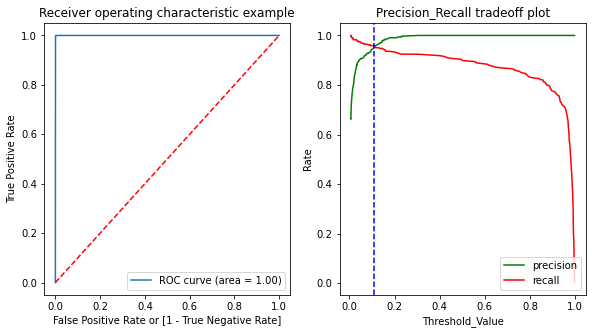

In [73]:
xgb_threshold = roc_precision_recall_curve_confus_matrix(y_train,xgb_train_pred_prob,
                                                        EnTrain=True,opt_thres=0.5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.80      0.84       148

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.109


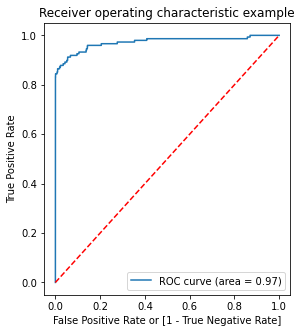

In [74]:
xgb_threshold_test = roc_precision_recall_curve_confus_matrix(y_test,xgb_test_pred_prob,
                                                        EnTrain=False,opt_thres=xgb_threshold)

In [75]:
dict4 = {'ML_Model':'XGBoosting Classifier','ROC_AUC_Score':0.97,'Threshold':0.109,'Precision':0.87,'Recall':0.80,'F1-Score':0.84}
final_df = final_df.append(dict4, ignore_index= True)
final_df

ML_Model  ROC_AUC_Score  Threshold  Precision  Recall  \
0    Logistic Regression           0.97      0.119       0.76    0.76   
1          Decision Tree           0.94      0.143       0.82    0.76   
2          Random Forest           0.97      0.141       0.78    0.82   
3  XGBoosting Classifier           0.97      0.109       0.87    0.80   

   F1-Score  
0      0.76  
1      0.79  
2      0.80  
3      0.84

## Imbalanced dataset models Results

In [77]:
final_df

ML_Model  ROC_AUC_Score  Threshold  Precision  Recall  \
0    Logistic Regression           0.97      0.119       0.76    0.76   
1          Decision Tree           0.94      0.143       0.82    0.76   
2          Random Forest           0.97      0.141       0.78    0.82   
3  XGBoosting Classifier           0.97      0.109       0.87    0.80   

   F1-Score  
0      0.76  
1      0.79  
2      0.80  
3      0.84

#### Conclusion ::: 

<i><b>
From the above results of models on imbalanced dataset, we can say Random Forest Classification is the best model as it has achieved the highest Recall score which is quiet required in case of such an imbalanced dataset. </b></i>

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.82      0.80       148

    accuracy                           1.00     85443
   macro avg       0.89      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.141


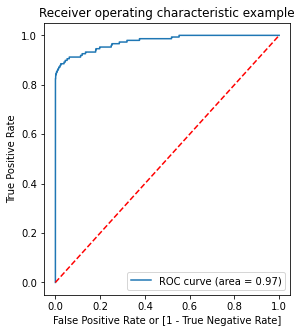

In [78]:
#initialise the model with optimum hyperparameters

clf_threshold = rfc_threshold_test
clf = RandomForestClassifier(random_state=42, n_jobs=-1)  
clf.set_params(**rfc_model_cv.best_estimator_.get_params()) # set best hyperparameters of randomforest classifier
clf.fit(X_train_pt, y_train) # fit the model
clf_test_pred_prob = clf.predict_proba(X_test_pt)[:,1] # predict probability of y_test

clf_final_Threshold= roc_precision_recall_curve_confus_matrix(y_test,clf_test_pred_prob,
                                                        EnTrain=False,Atv_F1_Max_Thres=False,
                                                        opt_thres=clf_threshold,TakeOverMan_Thres=True)

#print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 18
2nd Top var = 15
3rd Top var = 11


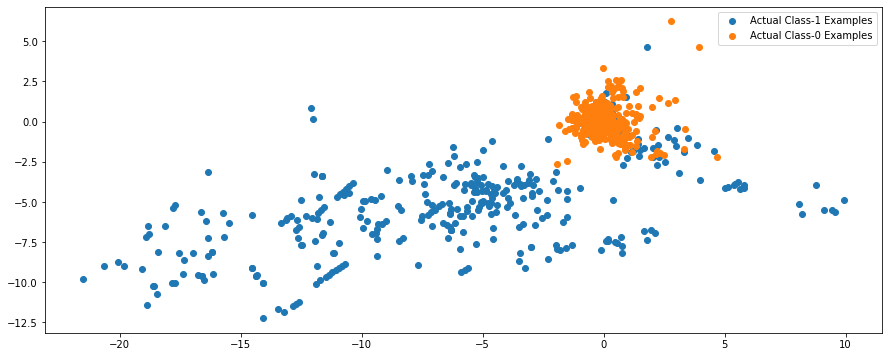

In [81]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_pt[np.where(y_train==1.0)]
X_train_0 = X_train_pt[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

## Model building with Balancing Classes

Perform class balancing with any of the two techniques mentioned below and compare the results

- Undersampling
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [163]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_pt, y_train)


In [83]:
print('X_train shape:\t', X_train_ros.shape)
print('y_train shape:\t', y_train_ros.shape)
print('X_test shape:\t\t\t\t', X_test_pt.shape)
print('y_test shape:\t\t\t\t', y_test.shape)

X_train shape:	 (398040, 30)
y_train shape:	 (398040,)
X_test shape:				 (85443, 30)
y_test shape:				 (85443,)


In [90]:
def create_model(model,params,RSC_n_iter,kfolds, X_train, y_train, X_test, y_test,en_trian_res=True,
                        Atv_F1_Max_Thres=False,man_threshold=0.5,En_Man_Ther=False):
    
    model_x = RandomizedSearchCV(estimator=model, param_distributions=params,n_iter=RSC_n_iter,scoring='roc_auc',n_jobs=-1,
                                 cv=kfolds.split(X_train,y_train),verbose=1,return_train_score=True,random_state=42)
    model_x.fit(X_train, y_train)

    model_x_res = pd.DataFrame(model_x.cv_results_)

    model.set_params(**model_x.best_estimator_.get_params())

    y_train_pred_prob = model.fit(X_train,y_train).predict_proba(X_train)[:,1]

    y_test_pred_prob = model.predict_proba(X_test)[:,1]
    
        
    if(en_trian_res):
        model_threshold = roc_precision_recall_curve_confus_matrix(y_train,y_train_pred_prob,
                                                                   EnTrain=en_trian_res,Atv_F1_Max_Thres=Atv_F1_Max_Thres,
                                                                   opt_thres=man_threshold,TakeOverMan_Thres=En_Man_Ther)
    else:
        model_threshold = man_threshold
        
    model_threshold_bal = roc_precision_recall_curve_confus_matrix(y_test,y_test_pred_prob,
                                                                   EnTrain=False,Atv_F1_Max_Thres=Atv_F1_Max_Thres,
                                                                   opt_thres=model_threshold,TakeOverMan_Thres=En_Man_Ther)
    return(y_train_pred_prob,y_test_pred_prob,model_threshold_bal,model_x)

### 1. Logistic Regression

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  2.9min finished


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Best optimum threshold value is:  0.5


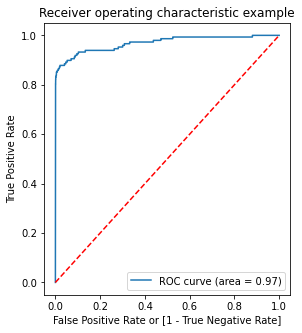

In [91]:
#Logistic Regression
 # logistic parameters
    
lg_params = {'C':np.arange(0.0001, 1, 0.02),'max_iter':range(50,300,50)}

kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
lg_model_ros = LogisticRegression(random_state=42, n_jobs=-1)
rsc_n_iter = 25

#model training and evaluation
lg_ros_train_prob,lg_ros_test_prob, lg_ros_Opt_thres,lg_ros_cv=create_model(lg_model_ros,lg_params,rsc_n_iter,kfolds,
                                                                                    X_train_ros, y_train_ros,X_test_pt, y_test,
                                                                                    en_trian_res=False,Atv_F1_Max_Thres=False,
                                                                                    man_threshold=0.5,En_Man_Ther=True)

In [101]:
dict6 = {'Model':['Logistic Regression'],'ROC_AUC':[0.97],'Threshold':[0.5],'Precision':[0.06],'Recall':[0.88],
                 'F1-Score':[0.11]}

final_df_1 = pd.DataFrame(dict6)
final_df_1

Model  ROC_AUC  Threshold  Precision  Recall  F1-Score
0  Logistic Regression     0.97        0.5       0.06    0.88      0.11

### 2. DecisionTree Classification

In [95]:
dtc_cpp = DecisionTreeClassifier(random_state=42)
path = dtc_cpp.cost_complexity_pruning_path(X_train_ros,y_train_ros)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 18.0min finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.70      0.75      0.72       148

    accuracy                           1.00     85443
   macro avg       0.85      0.87      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.5


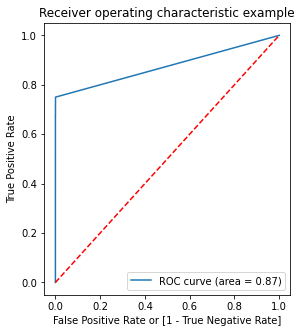

In [97]:
dt_params_ros = {'ccp_alpha':list(np.arange(0.0,5.5e-5,0.1e-5)),
                  'min_samples_split':range(2,10,2),'min_samples_leaf':range(1,30,2)}  #--> list of values
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=False) 
dt_model_ros = DecisionTreeClassifier(random_state=42,criterion='entropy')
rsc_n_iter = 50

#model training and evaluation
dt_ros_tr_prob,dt_ros_tst_prob,dt_ros_thres,dt_ros_cv = create_model(dt_model_ros,dt_params_ros,rsc_n_iter,kfolds,
                                                                                 X_train_ros,y_train_ros,X_test_pt,y_test,
                                                                                 en_trian_res=False,Atv_F1_Max_Thres=False,
                                                                                 man_threshold=0.5,En_Man_Ther=True)

0.9898648648648649
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.70      0.73      0.71       148

    accuracy                           1.00     85443
   macro avg       0.85      0.86      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.99


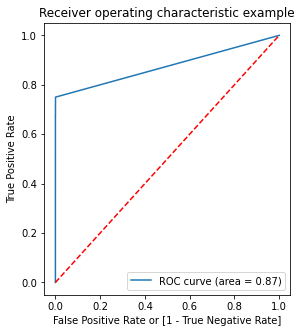

In [98]:
#Check best threshold values from roc_auc
fpr, tpr, thresholds = metrics.roc_curve(y_train_ros, dt_ros_tr_prob,drop_intermediate = False )
threshold_dt_ros = thresholds[np.argmax(tpr-fpr)]
print(threshold_dt_ros)
_=roc_precision_recall_curve_confus_matrix(y_test,dt_ros_tst_prob,
                                         EnTrain=False,Atv_F1_Max_Thres=False,opt_thres=threshold_dt_ros,
                                           TakeOverMan_Thres=True)

In [102]:
dict7 = {'Model':'Decision Tree','ROC_AUC':0.87,'Threshold':0.99,'Precision':0.70,'Recall':0.73,
                 'F1-Score':0.71}

final_df_1 = final_df_1.append(dict7, ignore_index=True)
final_df_1

Model  ROC_AUC  Threshold  Precision  Recall  F1-Score
0  Logistic Regression     0.97       0.50       0.06    0.88      0.11
1        Decision Tree     0.87       0.99       0.70    0.73      0.71

### 3. Random Forest Classifier

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 59.3min finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.74      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.5


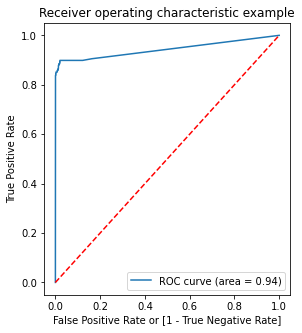

In [104]:
#RFC
rfc_params_ros = {'n_estimators':range(10,100,5),'max_depth':range(2,15),'criterion':['gini','entropy']}
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True) 
rfc_model_ros = RandomForestClassifier(random_state=42, n_jobs=-1)
rsc_n_iter = 25
#model training and evaluation
rfc_ros_tr_prob,rfc_ros_tst_prob,rfc_ros_thres,rfc_ros_cv = create_model(rfc_model_ros,rfc_params_ros,rsc_n_iter,kfolds,
                                                                                 X_train_ros,y_train_ros,X_test_pt,y_test,
                                                                                 en_trian_res=False,Atv_F1_Max_Thres=False,
                                                                                 man_threshold=0.5,En_Man_Ther=True)

0.9254319974713037
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.98      0.44      0.61       148

    accuracy                           1.00     85443
   macro avg       0.99      0.72      0.80     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.925


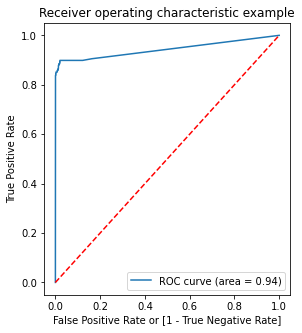

In [106]:
#Check best threshold values from roc_auc
fpr, tpr, thresholds = metrics.roc_curve(y_train_ros, rfc_ros_tr_prob,drop_intermediate = False )
rfc_ros_threshold = thresholds[np.argmax(tpr-fpr)]
print(rfc_ros_threshold)
_=roc_precision_recall_curve_confus_matrix(y_test,rfc_ros_tst_prob,
                                         EnTrain=False,Atv_F1_Max_Thres=False,opt_thres=rfc_ros_threshold,
                                           TakeOverMan_Thres=True)

In [107]:
dict7 = {'Model':'Random Forest','ROC_AUC':0.94,'Threshold':0.925,'Precision':0.98,'Recall':0.44,'F1-Score':0.61}

final_df_1 =final_df_1.append(dict7, ignore_index=True)
final_df_1

Model  ROC_AUC  Threshold  Precision  Recall  F1-Score
0  Logistic Regression     0.97      0.500       0.06    0.88      0.11
1        Decision Tree     0.87      0.990       0.70    0.73      0.71
2        Random Forest     0.94      0.925       0.98    0.44      0.61

### 4. XG Boosting Classifier

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  7.0min finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.5


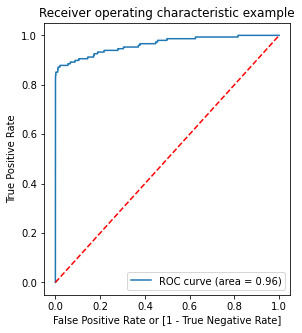

In [108]:
xgb_params_ros = {'n_estimators':range(5,100,5),
               'learning_rate':list(np.arange(0.05,0.5,0.02)),'colsample_bytree':list(np.arange(0.1,1,0.1))}

xgb_model_ros = XGBClassifier(random_state=42, n_jobs=-1,seed=42,gamma=0.9,reg_alpha=0.1,tree_method='hist',max_depth=7)
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True) 
rsc_n_iter = 15

#model training and evaluation
xgb_ros_tr_prob,xgb_ros_tst_prob,xgb_ros_thres,xgb_ros_cv=create_model(xgb_model_ros,xgb_params_ros,rsc_n_iter,
                                                                                   kfolds,X_train_ros,y_train_ros,
                                                                                   X_test_pt,y_test,en_trian_res=False,
                                                                                   Atv_F1_Max_Thres=False,
                                                                                   man_threshold=0.5,En_Man_Ther=True)

0.9989957
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.98      0.66      0.79       148

    accuracy                           1.00     85443
   macro avg       0.99      0.83      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.999


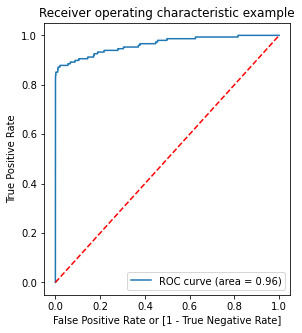

In [109]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_ros, xgb_ros_tr_prob,drop_intermediate = False )
xgb_ros_threshold = thresholds[np.argmax(tpr-fpr)]
print(xgb_ros_threshold)
_=roc_precision_recall_curve_confus_matrix(y_test,xgb_ros_tst_prob,
                                         EnTrain=False,Atv_F1_Max_Thres=False,opt_thres=xgb_ros_threshold,
                                           TakeOverMan_Thres=True)

In [111]:
dict8 = {'Model':'XGB Classifier','ROC_AUC':0.96,'Threshold':0.999,'Precision':0.98,'Recall':0.66,'F1-Score':0.79}

final_df_1 =final_df_1.append(dict8, ignore_index=True)
final_df_1

Model  ROC_AUC  Threshold  Precision  Recall  F1-Score
0  Logistic Regression     0.97      0.500       0.06    0.88      0.11
1        Decision Tree     0.87      0.990       0.70    0.73      0.71
2        Random Forest     0.94      0.925       0.98    0.44      0.61
3       XGB Classifier     0.96      0.999       0.98    0.66      0.79

## Balanced dataset models Results with Random Oversampling Technique

In [112]:
final_df_1

Model  ROC_AUC  Threshold  Precision  Recall  F1-Score
0  Logistic Regression     0.97      0.500       0.06    0.88      0.11
1        Decision Tree     0.87      0.990       0.70    0.73      0.71
2        Random Forest     0.94      0.925       0.98    0.44      0.61
3       XGB Classifier     0.96      0.999       0.98    0.66      0.79

### Conclusion:::
<i><b>
From the above results of models on balanced dataset using RandomOverSampling technique, we can observe that Logistic Regression has come out to be the best model in terms of highest AUC and Recall score.</i></b>

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.98      0.65      0.78       148

    accuracy                           1.00     85443
   macro avg       0.99      0.82      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.999


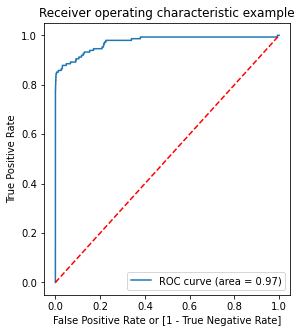

In [153]:
#initialise the model with optimum hyperparameters
clf_threshold_value = xgb_ros_threshold
clf=XGBClassifier(random_state=42, n_jobs=-1,seed=42,gamma=0.9,reg_alpha=0.1,tree_method='hist')
clf.set_params(**xgb_ros_cv.best_estimator_.get_params()) # set best hyperparameters of randomforest classifier
clf.fit(X_train_smote, y_train_smote) # fit the model
clf_test_pred_prob = clf.predict_proba(X_test_pt)[:,1] # predict probability of y_test

clf_Threshold= roc_precision_recall_curve_confus_matrix(y_test,clf_test_pred_prob,
                                                        EnTrain=False,Atv_F1_Max_Thres=False,
                                                        opt_thres=clf_threshold_value,TakeOverMan_Thres=True)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 15
2nd Top var = 11
3rd Top var = 5


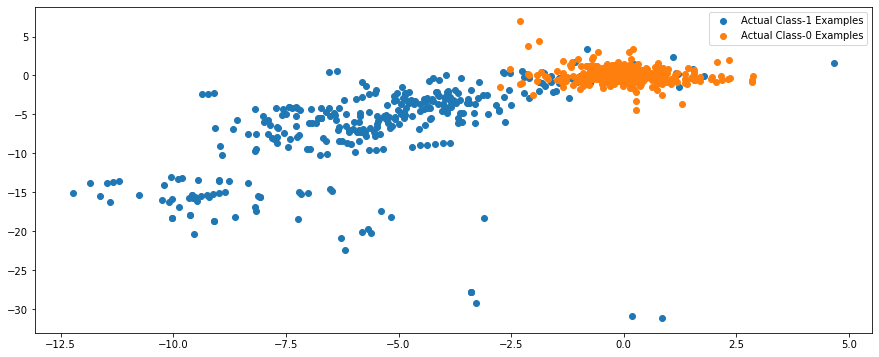

In [155]:

var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_ros[np.where(y_train==1.0)]
X_train_0 = X_train_ros[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

### Applying SMOTE to Imbalanced dataset  and model building

In [115]:
smo = SMOTE(random_state=42)
X_train_smote, y_train_smote = smo.fit_resample(X_train_pt, y_train)

In [116]:
print('X_train shape:\t', X_train_smote.shape)
print('y_train shape:\t', y_train_smote.shape)
print('X_test shape:\t\t\t\t', X_test_pt.shape)
print('y_test shape:\t\t\t\t', y_test.shape)

X_train shape:	 (398040, 30)
y_train shape:	 (398040,)
X_test shape:				 (85443, 30)
y_test shape:				 (85443,)


### 1. Logistic Regression 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 13.8min finished


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.87      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Best optimum threshold value is:  0.5


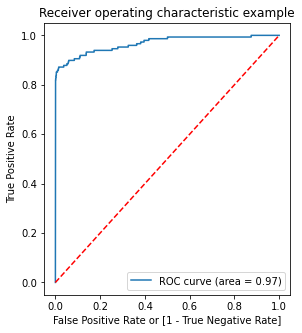

In [117]:
#Logistic Regression

lg_params = {'C':np.arange(0.0001, 2, 0.02),'max_iter':range(0,300,5)}
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=False)
lg_model_smote = LogisticRegression(random_state=42, n_jobs=-1)
rsc_n_iter = 100

#model training and evaluation
lg_smote_tr_prob,lg_smote_tst_prob,lg_smote_thres,lg_smote_cv = create_model(lg_model_smote,lg_params,rsc_n_iter,kfolds,
                                                                            X_train_smote,y_train_smote,X_test_pt,y_test,
                                                                            en_trian_res=False,Atv_F1_Max_Thres=False,
                                                                            man_threshold=0.5,En_Man_Ther=True)

In [118]:
lg_smote_cv.best_params_

{'max_iter': 125, 'C': 1.8401}

In [126]:
dict11 = {'Model':['Logistic Regression'],'ROC_AUC':[0.97],'Threshold':[0.5],'Precision':[0.06],'Recall':[0.87],
                 'F1-Score':[0.11]}

final_df_2 = pd.DataFrame(dict11)
final_df_2

Model  ROC_AUC  Threshold  Precision  Recall  F1-Score
0  Logistic Regression     0.97        0.5       0.06    0.87      0.11

### 2. Decision Tree Classifier

In [120]:
### Total Impurity vs effective alpha for training set

dt_cpp = DecisionTreeClassifier(random_state=42)
path = dt_cpp.cost_complexity_pruning_path(X_train_smote,y_train_smote)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 32.0min finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.23      0.78      0.35       148

    accuracy                           1.00     85443
   macro avg       0.61      0.89      0.68     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.5


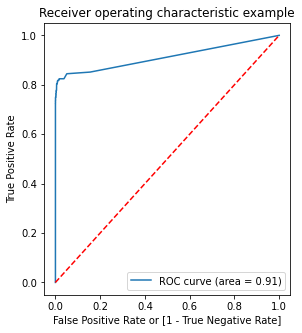

In [121]:
dt_params_smote = {'max_depth':range(2,50,2),'ccp_alpha':list(np.arange(0.0,5.5e-5,0.1e-5)),
                  'min_samples_split':range(2,10,2),'min_samples_leaf':range(1,30,2)}  #--> list of values
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True) 
dt_model_smote = DecisionTreeClassifier(random_state=42,criterion='entropy')
rsc_n_iter = 40

#model training and evaluation
dt_smote_tr_prob,dt_smote_tst_prob,dt_smote_thres,dt_smote_cv = create_model(dt_model_smote,dt_params_smote,
                                                                                rsc_n_iter,kfolds,X_train_smote,
                                                                                y_train_smote,X_test_pt,y_test,
                                                                                en_trian_res=False,
                                                                                Atv_F1_Max_Thres=False,
                                                                                man_threshold=0.5,
                                                                                En_Man_Ther=True)

0.5172413793103449
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.23      0.78      0.36       148

    accuracy                           1.00     85443
   macro avg       0.62      0.89      0.68     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.517


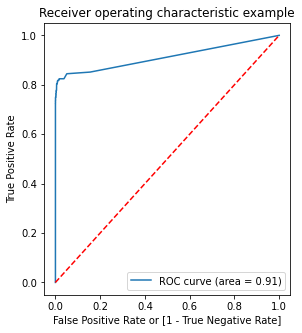

In [123]:
#Check best threshold values from roc_auc
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, dt_smote_tr_prob,drop_intermediate = False )
dt_smote_threshold = thresholds[np.argmax(tpr-fpr)]
print(dt_smote_threshold)
_=roc_precision_recall_curve_confus_matrix(y_test,dt_smote_tst_prob,
                                         EnTrain=False,Atv_F1_Max_Thres=False,opt_thres=dt_smote_threshold,
                                           TakeOverMan_Thres=True)

In [129]:
dict12 = {'Model':'Decision Tree','ROC_AUC':0.91,'Threshold':0.517,'Precision':0.23,'Recall':0.78,
                 'F1-Score':0.36}

final_df_2 =final_df_2.append(dict12, ignore_index=True)
final_df_2

Model  ROC_AUC  Threshold  Precision  Recall  F1-Score
0  Logistic Regression     0.97      0.500       0.06    0.87      0.11
1        Decision Tree     0.91      0.517       0.23    0.78      0.36

### 3. Random Forest Classifier

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 107.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 228.4min finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.81      0.83       148

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.5


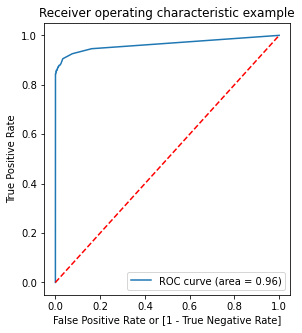

In [130]:
#RFC
rfc_params_smote = {'n_estimators':range(10,200,5)}
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True) 
rfc_model_smote = RandomForestClassifier(random_state=42, n_jobs=-1,criterion='entropy')
rsc_n_iter = 20
#model training and evaluation
rfc_smote_tr_prob,rfc_smote_tst_prob,rfc_smote_thres,rfc_smote_cv=create_model(rfc_model_smote,rfc_params_smote,rsc_n_iter,kfolds,
                                                                              X_train_smote,y_train_smote,X_test_pt,y_test,
                                                                                  en_trian_res=False,Atv_F1_Max_Thres=False,
                                                                              man_threshold=0.5,En_Man_Ther=True)

In [133]:
rfc_smote_cv.best_params_

{'n_estimators': 190}

0.7526315789473684
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.73      0.83       148

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.753


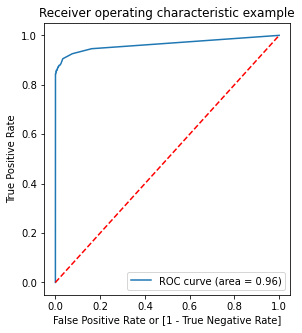

In [134]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, rfc_smote_tr_prob,drop_intermediate = False )
threshold_rfc_smote = thresholds[np.argmax(tpr-fpr)]
print(threshold_rfc_smote)
_=roc_precision_recall_curve_confus_matrix(y_test,rfc_smote_tst_prob,
                                         EnTrain=False,Atv_F1_Max_Thres=False,opt_thres=threshold_rfc_smote,
                                         TakeOverMan_Thres=True)

In [140]:
dict13 = {'Model':'Random Forest Classifier','ROC_AUC':0.96,'Threshold':0.753,'Precision':0.96,'Recall':0.73,
                 'F1-Score':0.83}

final_df_2 =final_df_2.append(dict13, ignore_index=True)
final_df_2

Model  ROC_AUC  Threshold  Precision  Recall  F1-Score
0       Logistic Regression     0.97      0.500       0.06    0.87      0.11
1             Decision Tree     0.91      0.517       0.23    0.78      0.36
2  Random Forest Classifier     0.96      0.753       0.96    0.73      0.83

### 4. XG Boost Classifier

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 20.2min finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.81      0.78       148

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.5


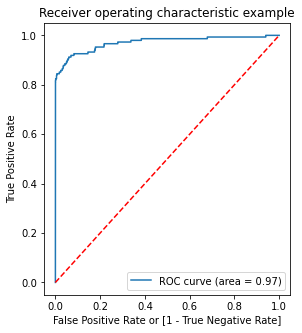

In [142]:
xgb_params = {'n_estimators':range(100,150),'max_depth':range(2,15),'min_child_weight':list(np.arange(0.1,1,0.1)),
               'learning_rate':list(np.arange(0.01,0.5,0.1)),'colsample_bytree':list(np.arange(0.1,1,0.1))}

xgb_model_smote = XGBClassifier(random_state=42, n_jobs=-1,seed=42,gamma=0.9,reg_alpha=0.1,tree_method='hist')

kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True) 
rsc_n_iter = 15

#model training and evaluation
xgb_smote_tr_prob,xgb_smote_tst_prob,xgb_smote_thres,xgb_smote_cv=create_model(xgb_model_smote,xgb_params,rsc_n_iter,
                                                                                  kfolds,X_train_smote,y_train_smote,
                                                                                  X_test_pt,y_test,en_trian_res=False,
                                                                                  Atv_F1_Max_Thres=False,
                                                                                  man_threshold=0.5,En_Man_Ther=True)

In [143]:
xgb_smote_cv.best_params_

{'n_estimators': 136,
 'min_child_weight': 0.9,
 'max_depth': 6,
 'learning_rate': 0.41000000000000003,
 'colsample_bytree': 0.2}

0.9456267
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.75      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.946


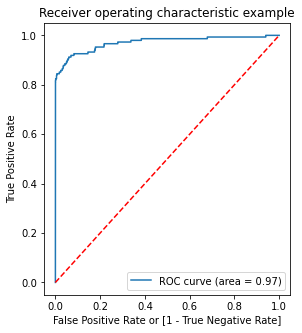

In [144]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, xgb_smote_tr_prob,drop_intermediate = False )
threshold_xgb_smote = thresholds[np.argmax(tpr-fpr)]
print(threshold_xgb_smote)
_=roc_precision_recall_curve_confus_matrix(y_test,xgb_smote_tst_prob,
                                         EnTrain=False,Atv_F1_Max_Thres=False,opt_thres=threshold_xgb_smote,
                                         TakeOverMan_Thres=True)

In [145]:
dict15 = {'Model':'XG Boosting Classifier','ROC_AUC':0.97,'Threshold':0.946,'Precision':0.93,'Recall':0.75,
                 'F1-Score':0.83}

final_df_2 =final_df_2.append(dict15, ignore_index=True)
final_df_2

Model  ROC_AUC  Threshold  Precision  Recall  F1-Score
0       Logistic Regression     0.97      0.500       0.06    0.87      0.11
1             Decision Tree     0.91      0.517       0.23    0.78      0.36
2  Random Forest Classifier     0.96      0.753       0.96    0.73      0.83
3    XG Boosting Classifier     0.97      0.946       0.93    0.75      0.83

## Balanced dataset (SMOTE ) model results

In [148]:
final_df_2

Model  ROC_AUC  Threshold  Precision  Recall  F1-Score
0       Logistic Regression     0.97      0.500       0.06    0.87      0.11
1             Decision Tree     0.91      0.517       0.23    0.78      0.36
2  Random Forest Classifier     0.96      0.753       0.96    0.73      0.83
3    XG Boosting Classifier     0.97      0.946       0.93    0.75      0.83

### Conclusion:::
<i><b>
From the above results of models on balanced dataset using SMOTE technique, we can observe that XG Boosting classfier has come out to be the best model in terms of highest AUC, Recall and F1- score.</i></b>

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.75      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Best optimum threshold value is:  0.946


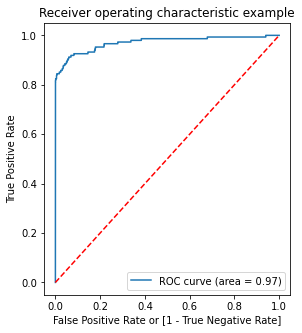

In [150]:
#initialise the model with optimum hyperparameters
clf_threshold_value = threshold_xgb_smote
clf=XGBClassifier(random_state=42, n_jobs=-1,seed=42,gamma=0.9,reg_alpha=0.1,tree_method='hist')
clf.set_params(**xgb_smote_cv.best_estimator_.get_params()) # set best hyperparameters of randomforest classifier
clf.fit(X_train_smote, y_train_smote) # fit the model
clf_test_pred_prob = clf.predict_proba(X_test_pt)[:,1] # predict probability of y_test

clf_Threshold= roc_precision_recall_curve_confus_matrix(y_test,clf_test_pred_prob,
                                                        EnTrain=False,Atv_F1_Max_Thres=False,
                                                        opt_thres=clf_threshold_value,TakeOverMan_Thres=True)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 15
2nd Top var = 11
3rd Top var = 28


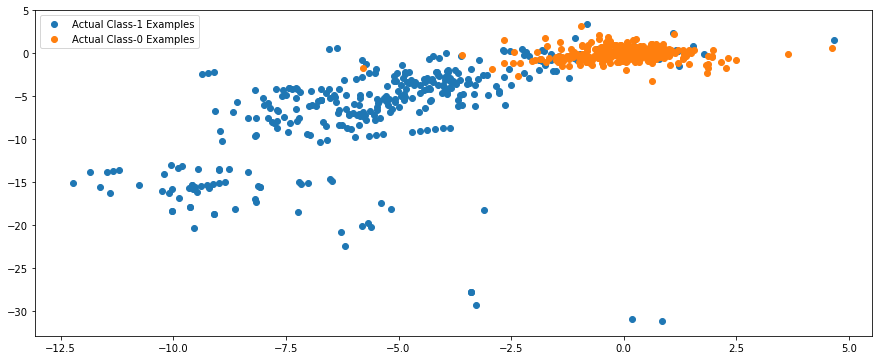

In [152]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_smote[np.where(y_train==1.0)]
X_train_0 = X_train_smote[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

# Summary ::: 

## Imbalanced dataset

In [156]:
final_df

ML_Model  ROC_AUC_Score  Threshold  Precision  Recall  \
0    Logistic Regression           0.97      0.119       0.76    0.76   
1          Decision Tree           0.94      0.143       0.82    0.76   
2          Random Forest           0.97      0.141       0.78    0.82   
3  XGBoosting Classifier           0.97      0.109       0.87    0.80   

   F1-Score  
0      0.76  
1      0.79  
2      0.80  
3      0.84

## Balanced dataset with Random Oversampling technique

In [157]:
final_df_1

Model  ROC_AUC  Threshold  Precision  Recall  F1-Score
0  Logistic Regression     0.97      0.500       0.06    0.88      0.11
1        Decision Tree     0.87      0.990       0.70    0.73      0.71
2        Random Forest     0.94      0.925       0.98    0.44      0.61
3       XGB Classifier     0.96      0.999       0.98    0.66      0.79

## Balanced Dataset with SMOTE technique

In [158]:
final_df_2

Model  ROC_AUC  Threshold  Precision  Recall  F1-Score
0       Logistic Regression     0.97      0.500       0.06    0.87      0.11
1             Decision Tree     0.91      0.517       0.23    0.78      0.36
2  Random Forest Classifier     0.96      0.753       0.96    0.73      0.83
3    XG Boosting Classifier     0.97      0.946       0.93    0.75      0.83

<b>
The best model results with having high ROC_AUC, Recall and F1-Score are from XGBoost Classifier.

The best model is the XG Boosting Classifier with Balanced dataset with SMOTE technique applied on it. It has given a very good score of combination of ROC-AUC score, Recall and F1-score.

Hence, The best model has been achieved through SMOTE techique for balancing the dataset.
</b>